In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model = Sequential()
model.add(Dense(100, activation='relu',
                input_shape=(32, 32, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 100)       200       
                                                                 
 dense_1 (Dense)             (None, 32, 32, 50)        5050      
                                                                 
 dense_2 (Dense)             (None, 32, 32, 5)         255       
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [6]:
input_layer = Input(shape=(32,32,1))
x = Dense(units=100, activation = 'relu')(input_layer)
x = Dense(units=50, activation = 'relu')(x)
ouput_layer = Dense(units=5, activation='softmax')(x)
model2 = Model(input_layer, ouput_layer)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 dense_4 (Dense)             (None, 32, 32, 100)       200       
                                                                 
 dense_5 (Dense)             (None, 32, 32, 50)        5050      
                                                                 
 dense_6 (Dense)             (None, 32, 32, 5)         255       
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.save('cnn_model.h5') # 모형 저장


### 분류신경망

In [49]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
from sklearn import datasets

np.random.seed(0)
tf.random.set_seed(0)

In [50]:
# 데이터 불러오기
raw_wine = datasets.load_wine()
raw_wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [51]:
# 피처, 타깃 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [52]:
# 피처 데이터 차원 확인
print(X.shape, y.shape)

# 타깃 데이터 종류 확인
print(set(y))


(178, 13) (178,)
{0, 1, 2}


In [53]:
# 타깃 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, random_state=0)

In [55]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [56]:
n_feat = X_train.shape[1] # 피처 갯수(변수)
n_class = len(set(y)) # 타겟 변수 갯수(3)
epo = 30 # epoch: 총 30단계로 학습 진행

In [57]:
model = Sequential()
model.add(Dense(20, input_dim = n_feat)) # 입력층
model.add(BatchNormalization()) # 배치정규화 실행
model.add(Activation('relu')) # 활성화 함수 지정
model.add(Dense(n_class)) # 출력층
model.add(Activation('softmax')) # 활성화함수: softmax함수

In [58]:
model.summary() # 신경망 모형구조 확인

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                280       
                                                                 
 batch_normalization_2 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dense_12 (Dense)            (None, 3)                 63        
                                                                 
 activation_5 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_______________________________________________________

In [59]:
# 모형 컴파일
model.compile(loss = 'categorical_crossentropy', # 손실함수
optimizer = 'adam', # 옵티마이저
metrics = ['accuracy']) # 평가기준

In [60]:
# 신경망 학습
hist = model.fit(X_train, y_train, epochs=epo, batch_size = 5)

Epoch 1/30
27/27 [==============================] - 1s 3ms/step - loss: 0.9726 - accuracy: 0.5263
Epoch 2/30
27/27 [==============================] - 0s 3ms/step - loss: 0.9175 - accuracy: 0.5113
Epoch 3/30
27/27 [==============================] - 0s 3ms/step - loss: 0.8663 - accuracy: 0.5714
Epoch 4/30
27/27 [==============================] - 0s 4ms/step - loss: 0.8106 - accuracy: 0.6241
Epoch 5/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7545 - accuracy: 0.6391
Epoch 6/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7795 - accuracy: 0.6015
Epoch 7/30
27/27 [==============================] - 0s 3ms/step - loss: 0.8250 - accuracy: 0.5714
Epoch 8/30
27/27 [==============================] - 0s 5ms/step - loss: 0.7587 - accuracy: 0.6316
Epoch 9/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7762 - accuracy: 0.6015
Epoch 10/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7425 - accuracy: 0.6090
Epoch 11/30
27/27 [

In [64]:
# 학습평가
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_test, y_test)[1])

5/5 [==============================] - 0s 5ms/step - loss: 0.4021 - accuracy: 0.8571
0.8571428656578064
2/2 [==============================] - 0s 15ms/step - loss: 0.4772 - accuracy: 0.8444
0.8444444537162781


In [69]:
# 정확도 및 손실 정도 시각화
import numpy as np
epoch = np.arange(1, epo + 1)
print(epoch)

accuracy = hist.history['accuracy']
print(accuracy)

loss = hist.history['loss']
print(loss)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[0.5263158082962036, 0.5112782120704651, 0.5714285969734192, 0.6240601539611816, 0.6390977501869202, 0.6015037298202515, 0.5714285969734192, 0.6315789222717285, 0.6015037298202515, 0.6090225577354431, 0.646616518497467, 0.6240601539611816, 0.7067669034004211, 0.7218044996261597, 0.7894737124443054, 0.7969924807548523, 0.7744361162185669, 0.7894737124443054, 0.7443609237670898, 0.7894737124443054, 0.8195488452911377, 0.7894737124443054, 0.8796992301940918, 0.8195488452911377, 0.8571428656578064, 0.8496240377426147, 0.9097744226455688, 0.8571428656578064, 0.8421052694320679, 0.8721804618835449]
[0.9725568890571594, 0.9175385236740112, 0.8663405776023865, 0.8106130361557007, 0.7545467019081116, 0.7794619798660278, 0.8250114917755127, 0.7586719393730164, 0.7761874198913574, 0.7425220608711243, 0.711519718170166, 0.6953866481781006, 0.6492815017700195, 0.6434463858604431, 0.6227744817733765, 0.58980

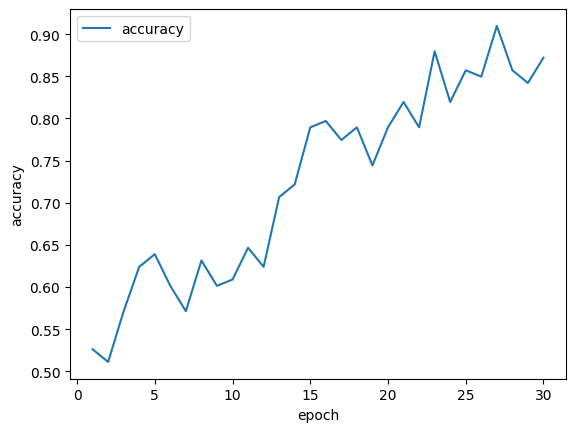

In [70]:
# 정확도 학습 시각화
import matplotlib.pyplot as plt
plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

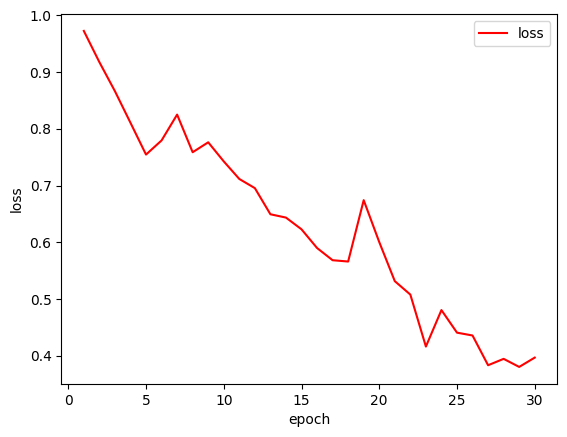

In [71]:
# 손실 그래프
plt.plot(epoch, loss, 'r', label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()